In [17]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import matplotlib as mpl
mpl.rc("font", family='Droid Sans Fallback', weight="bold")

名称: CSK_XYY_UP_DOWN_120D_RC            
来源: 20240311-东北证券-因子选股系列之八：股票收益的协偏度因子             
作者: RC          
构造方法:         
1. 构建辅助因子：             
其中，上行协偏度因子的定义为:CSK_up_XYY=E[(X-E[X])(Y-E[Y])^2|Y>E[Y]] / (E[(X-E[X])^2|Y>E[Y]] * E[(Y-E[Y])^2|Y>E[Y]])             
下行协偏度因子的定义为CSK_up_XYY=E[(X-E[X])(Y-E[Y])^2|Y<E[Y]] / (E[(X-E[X])^2|Y>E[Y]] * E[(Y-E[Y])^2|Y<E[Y]])        
其中 X 变量代表个股收益序列, Y 变量代表市场收益序列。(这里用zz1000表示Y)            
2. 回溯： 
CSK_XYY_UP_120D :以过去 120 个交易日为回溯窗口，计算个股收益上行协偏度。    
CSK_XYY_DOWN_120D :以过去 120 个交易日为回溯窗口，计算个股收益下行协偏度。        
3. 数值处理：        
CSK_XYY_UP_DOWN_120D :CSK_XYY_DOWN_120D_正交化、标准化后相减。         

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


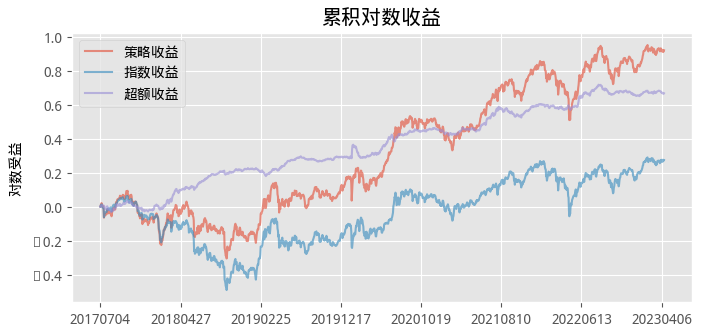

,指数收益,超额收益,策略收益
年化收益率,0.049,0.119,0.164
年化波动率,0.218,0.071,0.245
夏普率,0.224,1.675,0.667
最大回撤,-0.554,-0.078,-0.399
收益回撤比,0.088,1.528,0.410
胜率,0.539,0.538,0.566
盈亏比,0.887,1.158,0.861


In [3]:
factor = ff.read('CSK_XYY_UP_DOWN_120D_RC')
p = ff.run((factor*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)

In [2]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pandas as pd
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import extend
import os

In [3]:
import coskewness_create

In [7]:
date_lst

Index(['20100104', '20100105', '20100106', '20100107', '20100108', '20100111',
       '20100112', '20100113', '20100114', '20100115',
       ...
       '20240506', '20240507', '20240508', '20240509', '20240510', '20240513',
       '20240514', '20240515', '20240516', '20240517'],
      dtype='object', length=3489)

In [8]:
zz1000.reindex(date_lst)

20100104         NaN
20100105         NaN
20100106         NaN
20100107         NaN
20100108         NaN
              ...   
20240513   -0.016092
20240514    0.008494
20240515   -0.007356
20240516    0.005238
20240517    0.013510
Length: 3489, dtype: float64

In [10]:
n = 120
date_lst = ff.read('close').columns
end = date_lst[-1]
start = date_lst[0] 
rets_all = ff.rets_all.loc[:,start:end]
# zz1000 = pd.read_pickle('/mydata2/wangs/data/feature/zz1000.pk')
zz1000 = ff.rets_all.mean()
zz1000 = zz1000.reindex(date_lst).loc[start:end]
CSK_XYY_UP_DOWN_120D = coskewness_create.get_CSK_XYY(rets_all,zz1000,n,'all')

mv = ff.read('total_mv')
mv_match = mv.reindex(index= CSK_XYY_UP_DOWN_120D.index,columns = CSK_XYY_UP_DOWN_120D.columns)
CSK_XYY_UP_DOWN_120D_neu = extend.spread_reg(CSK_XYY_UP_DOWN_120D, mv_match, ind=True) # ind=True为同时进行市值与行业中性化

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3370/3370 [00:17<00:00, 188.14it/s]


KeyError: '20110112'

In [20]:
mv = ff.read('total_mv').loc[:,'20200000':]
CSK_XYY_UP_DOWN_120D_match = CSK_XYY_UP_DOWN_120D.reindex(index= mv.index,columns = mv.columns)
CSK_XYY_UP_DOWN_120D_neu = extend.spread_reg(CSK_XYY_UP_DOWN_120D_match, mv, ind=True) # ind=True为同时进行市值与行业中性化

long normal
持仓模式： 普通模式
持仓周期： 1
仓位数：   100
排序:      正序
回测部分：
回测仓位数： 100
回测手续费： 0
交易模式： t日收盘价买入，收盘价卖出


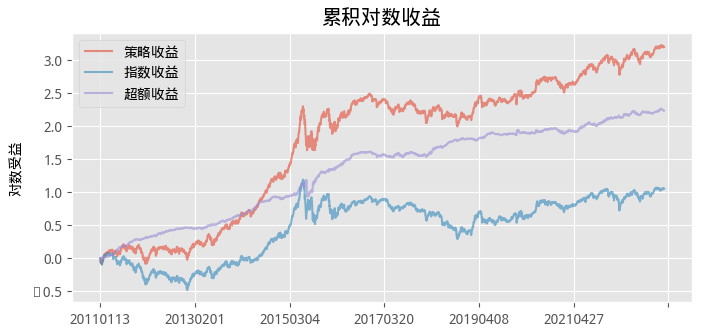

,指数收益,超额收益,策略收益
年化收益率,0.089,0.188,0.269
年化波动率,0.255,0.098,0.300
夏普率,0.347,1.913,0.895
最大回撤,-0.901,-0.252,-0.665
收益回撤比,0.098,0.744,0.404
胜率,0.553,0.562,0.574
盈亏比,0.860,1.161,0.873


In [18]:
p = ff.run((CSK_XYY_UP_DOWN_120D.shift(1,axis = 1)*ff.filter0).loc[:,:'20230416'], positions=100, period=1, fees=0)

In [21]:
import os
os.getcwd()

'/home/wangs/rs/rc/协偏度因子'